In [8]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from astropy.cosmology import LambdaCDM
import astropy.units as u
from scipy import stats
import random

CHI-SQUARED VALUES OF DIFFERENT MODELS:


chi-squared of LambdaCDM model with Ω_Λ = 0.7, Ω_M = 0.3 is  0.2613368712609097
This very high value indicates the model is inconsistent with the data.


chi-squared of LambdaCDM model with Ω_Λ = 0.0, Ω_M = 0.3 is  0.23708875603766189
This very high value indicates the model is inconsistent with the data.


chi-squared of μ(z)=5log_10(4.29x10^8z) is  0.00848089164379755
This very low value indicates the model is consistent with the data.




P-VALUES OF DIFFERENT MODELS:
p-value of Ω_Λ = 0.7, Ω_M = 0.3 is 0.01559223406850797
The p-value of p > 0.05 for this model suggests the model is very unlikely to have any significance.


p-value of Ω_Λ = 0.0, Ω_M = 0.3 is 5.026679139844915e-41
The p-value of p > 0.05 for this model suggests the model is very unlikely to have any significance.


p-value of μ(z)=5log_10(4.29x10^8z) is 0.01559223406850797
The p-value of p < 0.05 for this model suggests the model is very likely to be significant.


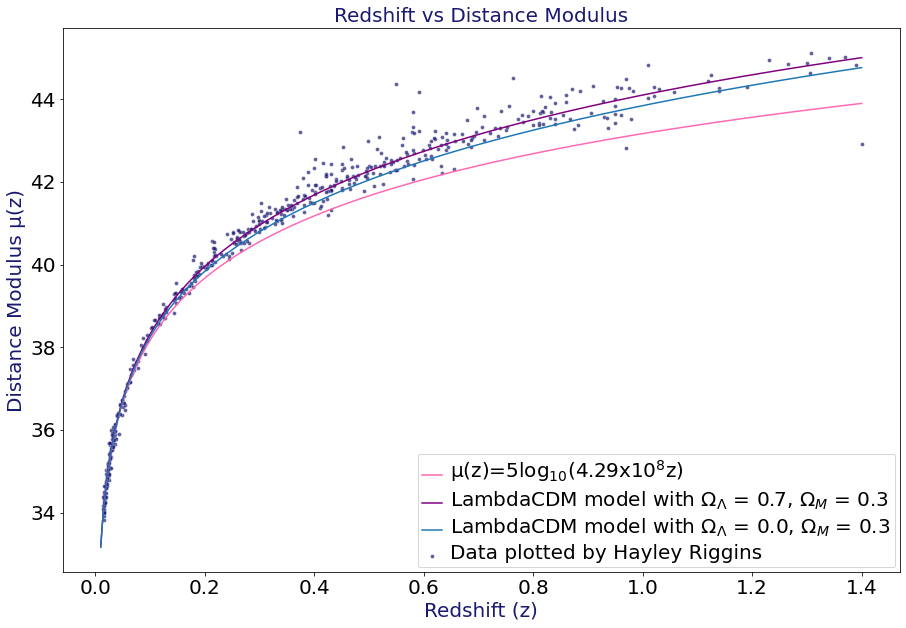

In [113]:
#load data
test1=sns.load_dataset("test1")

#creating exponential model
def func(z):
    mu = 5*np.log10(4.3E8*z)
    return mu
line = func(test1["A"])

#creating the LambdaCDM model for omega_lambda=0.7, omega_M=0.3 on the same plot as the data 
Zgrid = np.linspace(0.01,1.4,557)
Cosmo = LambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3,Ode0=0.7)
ModelDM = Cosmo.distmod(Zgrid).value
#creating the LambdaCDM model for omega_lambda=0.0, omega_M=0.3 on the same plot as the data
zgrid = np.linspace(0.01,1.4,557)
cosmo = LambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3,Ode0=0.0)
modelDM = cosmo.distmod(zgrid).value




#adjusting the visusals of the plot of data
plt.figure(figsize=(15,10)) 
plt.title("Redshift vs Distance Modulus",color="midnightblue")
plt.xlabel("Redshift (z)",color="midnightblue")
plt.ylabel("Distance Modulus \u03BC(z)",color="midnightblue")

#plotting the data
ax = sns.scatterplot(data=test1,x="A",y="B",s=15,color="midnightblue",alpha=.7, label="Data plotted by Hayley Riggins")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)


#plot exponential line
sns.lineplot(test1["A"],line, color="hotpink", label = "\u03BC(z)=5log$_{10}$(4.29x10$^8$z)")

#plot ModelDM
sns.lineplot(Zgrid,ModelDM, color="purple", label="LambdaCDM model with $\Omega_\Lambda$ = 0.7, $\Omega_M$ = 0.3")

#plot modelDM
sns.lineplot(zgrid,modelDM,label="LambdaCDM model with $\Omega_\Lambda$ = 0.0, $\Omega_M$ = 0.3")

plt.setp(ax.get_legend().get_texts(), fontsize='20') 
plt.setp(ax.get_legend().get_title(), fontsize='30') 

#definfing chi squared test
def chi2(obs,expect):
    return sum((((obs-expect)**2))/expect)

#number of degrees of freedom = number of data points - 1
NDF = 556


print("CHI-SQUARED VALUES OF DIFFERENT MODELS:")
print("\n")

#chi squared tests
chi = chi2(ModelDM,test1["B"])/NDF
print("chi-squared of LambdaCDM model with \u03A9_\u039B = 0.7, \u03A9_M = 0.3 is ", chi)
print("This very high value indicates the model is inconsistent with the data.")
print("\n")

chi_two = chi2(modelDM,test1["B"])/NDF
print("chi-squared of LambdaCDM model with \u03A9_\u039B = 0.0, \u03A9_M = 0.3 is ", chi_two)
print("This very high value indicates the model is inconsistent with the data.")
print("\n")

chi3 = chi2(line,test1["B"])/NDF
print("chi-squared of \u03BC(z)=5log_10(4.29x10^8z) is ",chi3)
print("This very low value indicates the model is consistent with the data.")
print("\n")

print("\n")
print("P-VALUES OF DIFFERENT MODELS:")
statistic1, pvalue1 = stats.ttest_ind(modelDM,test1["B"])
statistic2, pvalue2 = stats.ttest_ind(ModelDM,test1["B"])
statistic, pvalue = stats.ttest_ind(line,test1["B"])

print("p-value of \u03A9_\u039B = 0.7, \u03A9_M = 0.3 is", pvalue)
print("The p-value of p > 0.05 for this model suggests the model is very unlikely to have any significance.")
print("\n")
print("p-value of \u03A9_\u039B = 0.0, \u03A9_M = 0.3 is", pvalue1)
print("The p-value of p > 0.05 for this model suggests the model is very unlikely to have any significance.")
print("\n")
print("p-value of \u03BC(z)=5log_10(4.29x10^8z) is", pvalue)
print("The p-value of p < 0.05 for this model suggests the model is very likely to be significant.")


The best fit value of omega_lambda is:


0.1816546762589928




/Users/jessicaflowers/opt/anaconda3/lib/python3.8/site-packages/astropy/cosmology/core.py:1449: RuntimeWarning: divide by zero encountered in log10
  val = 5. * np.log10(abs(self.luminosity_distance(z).value)) + 25.0


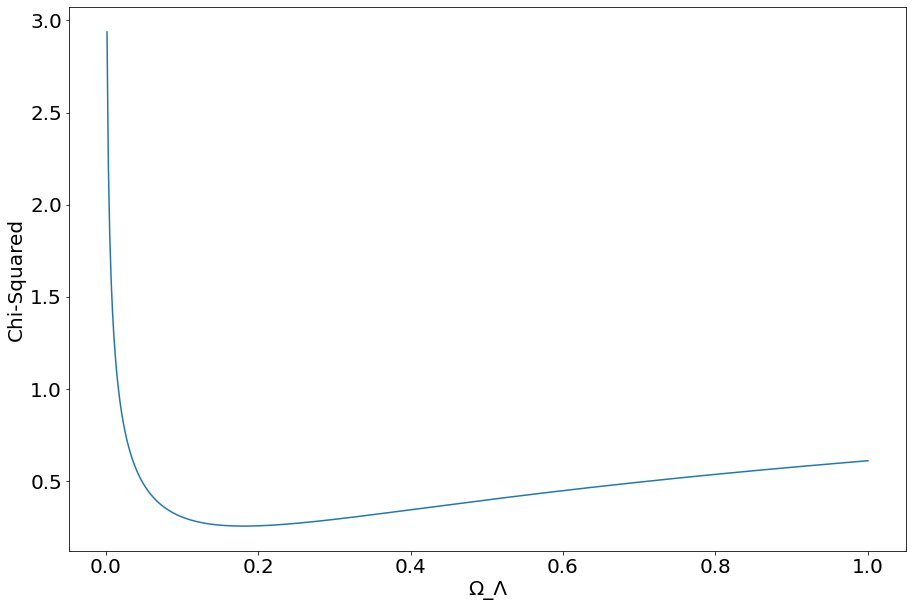

In [140]:
# Vary ΩΛ from 0–1 while letting Ωm = 1 − ΩΛ

omega = np.linspace(0,1,557) #creates values ranging from 0-1 for Ode0 to loop through 
Zgrid = np.linspace(0.01,1.4,557)

CHI = [] #find the chi squared value of each argument 
OM0 = []
for Ode0 in omega:
    Om0=1-Ode0
    Cosmo = LambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=1-Ode0,Ode0=Ode0)
    ModelDM1 = Cosmo.distmod(Om0).value
    chi4 = chi2(ModelDM1,test1["B"])/NDF
    CHI.append(chi4)
    OM0.append(Om0)


plt.figure(figsize=(15,10))
ax = sns.lineplot(OM0,CHI)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
plt.xlabel("\u03A9_\u039B")
plt.ylabel("Chi-Squared")

#computing the minimum value of chi^2 to find the best fit of omega_lambda
min_CHI=np.min(CHI)
index = (CHI.index(min_CHI,0,557))

print("The best fit value of omega_lambda is:")
print("\n")
print(OM0[index])
print("\n")